# Long vs Wide format

## Tidy data

![Tidy data](https://d33wubrfki0l68.cloudfront.net/6f1ddb544fc5c69a2478e444ab8112fb0eea23f8/91adc/images/tidy-1.png)

In [97]:
import pandas as pd
import seaborn as sns

### Each observation is a penguin

In [4]:
df = pd.read_csv('data/penguins.csv', sep=";")
df.head()

,"species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex"
0,"Adelie,Torgersen,39.1,18.7,181,3750,male"
1,"Adelie,Torgersen,39.5,17.4,186,3800,female"
2,"Adelie,Torgersen,40.3,18,195,3250,female"
3,"Adelie,Torgersen,NA,NA,NA,NA,NA"
4,"Adelie,Torgersen,36.7,19.3,193,3450,female"


In [5]:
# clean the column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
# we have to create an id column to keep track of each penguin
df['penguin_id'] = range(len(df))
df.head()

,"species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex",penguin_id
0,"Adelie,Torgersen,39.1,18.7,181,3750,male",0
1,"Adelie,Torgersen,39.5,17.4,186,3800,female",1
2,"Adelie,Torgersen,40.3,18,195,3250,female",2
3,"Adelie,Torgersen,NA,NA,NA,NA,NA",3
4,"Adelie,Torgersen,36.7,19.3,193,3450,female",4


In [15]:
df.columns

Index(['species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex', 'penguin_id'], dtype='object')

In [23]:
'''clean data'''
df[['species','island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']]=df['species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex'].str.split(",",expand=True)

In [29]:
df.drop('species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex', axis=1, inplace = True)

In [70]:
'''drop str value in the columns 2:6, so we can change the datatype into float and plot data.'''
df.drop([row for row in df.index if df.iloc[row].eq('NA').any()], axis=0, inplace=True)

In [118]:
df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']] = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].astype('float')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   penguin_id         333 non-null    int64  
 1   species            333 non-null    object 
 2   island             333 non-null    object 
 3   bill_length_mm     333 non-null    float64
 4   bill_depth_mm      333 non-null    float64
 5   flipper_length_mm  333 non-null    float64
 6   body_mass_g        333 non-null    float64
 7   sex                333 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

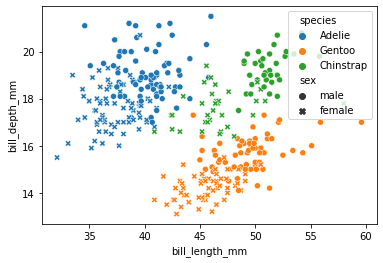

In [120]:
sns.scatterplot(data = df, x = 'bill_length_mm', y = 'bill_depth_mm', hue = 'species', style = 'sex')

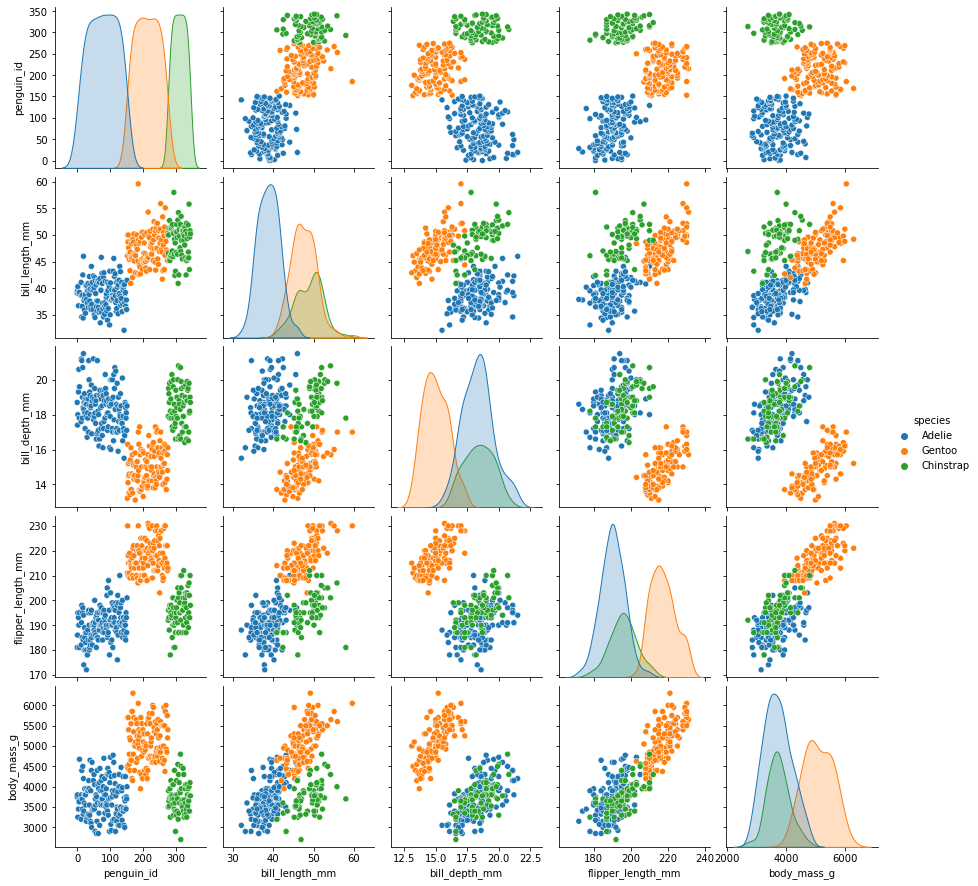

In [121]:
sns.pairplot(data=df, hue='species')

### But what if:each observation is a measurement of penguin's bill, and culmen_length, culmen_depth are categories of culmen measurements

## `df.melt`: from wide to long
- **id_vars**: Column(s) to use as identifier variables
- **value_vars**: Column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.
- **var_name**: Name to use for the ‘variable’ column.
- **value_name**: Name to use for the ‘value’ column.

In [122]:
df.columns

Index(['penguin_id', 'species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [123]:
df_melted = df.melt(id_vars=['penguin_id','sex', 'species'],  # column names from the original df
        value_vars=['bill_length_mm', 'bill_depth_mm'], # column names from the original df
        var_name='bill_measurement',  # new column name for the variable column
        value_name='value_mm')    # new column name for the values column
df_melted

,penguin_id,sex,species,bill_measurement,value_mm
0,0,male,Adelie,bill_length_mm,39.1
1,1,female,Adelie,bill_length_mm,39.5
2,2,female,Adelie,bill_length_mm,40.3
3,4,female,Adelie,bill_length_mm,36.7
4,5,male,Adelie,bill_length_mm,39.3
...,...,...,...,...,...
661,339,male,Chinstrap,bill_depth_mm,19.8
662,340,female,Chinstrap,bill_depth_mm,18.1
663,341,male,Chinstrap,bill_depth_mm,18.2
664,342,male,Chinstrap,bill_depth_mm,19.0


- Often used for plotting things with seaborn (except the pairplot)

<AxesSubplot:xlabel='bill_measurement', ylabel='value_mm'>

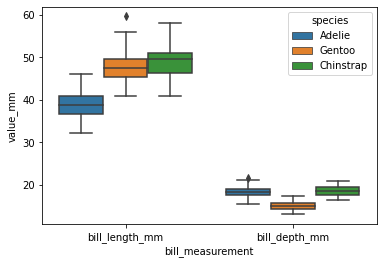

In [124]:
sns.boxplot(data=df_melted, y='value_mm', x='bill_measurement', hue = 'species')

<AxesSubplot:xlabel='bill_measurement', ylabel='value_mm'>

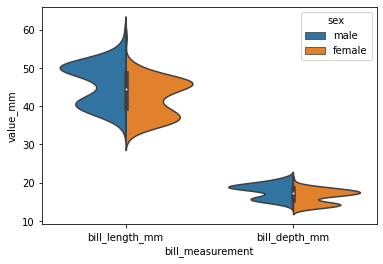

In [125]:
sns.violinplot(data=df_melted, y='value_mm', x='bill_measurement', hue = 'sex', split = True)

## ( `df.pivot`: from long to wide)

In [126]:
df_melted.pivot(index='penguin_id', columns='bill_measurement', values='value_mm')

bill_measurement,bill_depth_mm,bill_length_mm
penguin_id,,
0,18.7,39.1
1,17.4,39.5
2,18.0,40.3
4,19.3,36.7
5,20.6,39.3
...,...,...
339,19.8,55.8
340,18.1,43.5
341,18.2,49.6
